# Structures arborescentes, arbres binaires

## Introduction

La notion de **liste chaînée** est parfaite pour organiser un ensemble d'éléments destinés à être énumérés séquentiellement. Mais elle n'est pas adaptée aux accès ponctuels à des positions arbitraires dans la séquence puisqu'il faut alors pourcourir tous les maillons depuis la tête jusqu'à la position cherchée.

Les **structures arborescentes** organisent un ensemble d'éléments de façon que le nombre de «sauts» pour accéder à un élément particulier soit *limité*.

#### Exemple du système de fichiers

L'exemple le plus immédiat d'une telle structure est le **système de fichier** proposé par le système d'exploitation: il peut grouper un grand nombre de fichiers et/ou répertoires sans pour autant que l'accès à l'un d'eux ne dépasse beaucoup plus de 5 sauts.

<p style="text-align: center;">
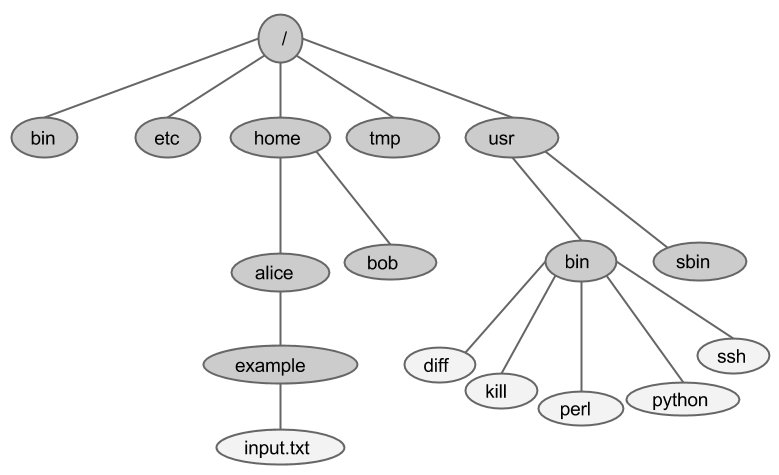
</p>

#### Exemple du DNS

Un autre exemple est le **DNS** (Système de nom de domaines) qui permet d'associer à nom de domaine comme *jhub.fdex.eu* (préalablement déclaré) une adresse ip 226.82.91.149

<p style="text-align: center;">
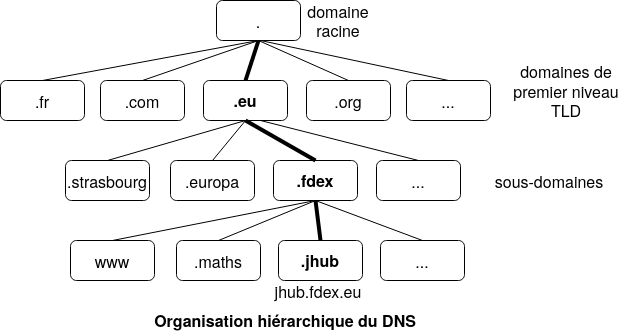
</p>

#### Exemple d'une page web

C'est aussi à l'aide d'une structure arborescente qu'on représente une **page web** (et de façon générale la plupart des documents manipulés informatiquement), par exemple:

<p style="text-align: center;">
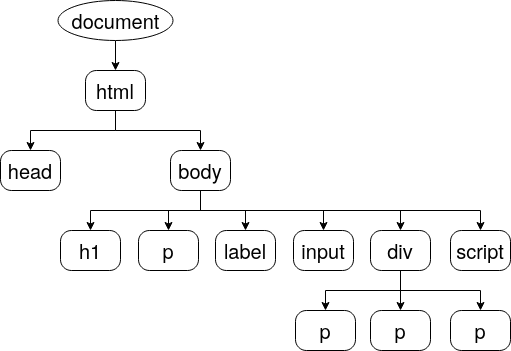
</p>

## Arbres binaires

Un **arbre binaire** \[ *binary tree* \] est une arborescence dans laquelle *chaque noeud a au plus deux enfants*. Comme nous le verrons ultérieurement, les arborescences générales réutilisent des techniques similaires à celle des arbres binaires, raison pour laquelle nous nous y limiterons dans un premier temps.

Voici par exemple un arbre binaire représentant le «pedigree» de Zoé, un cheval de course:

<p style="text-align: center;">
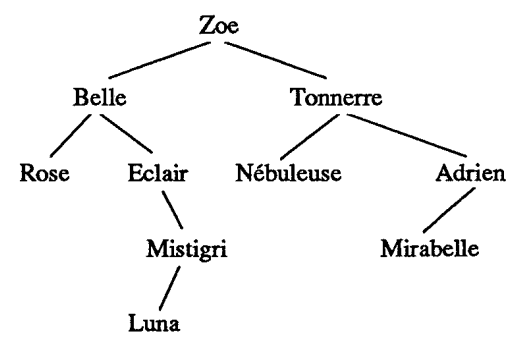
</p>

Voici encore un arbre binaire représentant l'expression **arithmétique** «infixe»: 
$$x-2y+\left(x+\dfrac{y}{z}\right)\times 3$$

<p style="text-align: center;">
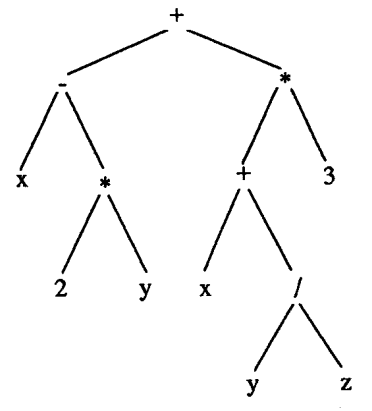
</p>

Voici une définition **récursive** d'un arbre binaire:
- il est soit vide $\emptyset$,
- soit c'est un triplet `(valeur, gauche, droit)` où `gauche` et `droit` sont des **arbres binaires**, `valeur` un élément de type arbitraire. 

Par exemple, l'arbre binaire «simple» ci-dessous peut se décrire par:

               A
              / \
             B   C       (A, (B, ∅, ∅), (C, (D, ∅, ∅), (E, ∅, ∅)))
                / \
               D   E

### Implémentation

Chaque «triplet» apparaissant dans un arbre est appelé **noeud** \[ *node* \] et il semble naturel de leur dédier une classe pour les modéliser:

<p style="text-align: center;">
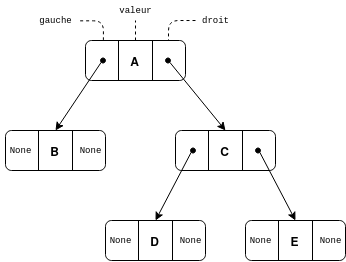
</p>

In [ ]:
class NoeudBin:
    def __init__(self, valeur, gauche=None, droit=None):
        self.valeur = valeur
        #self.parent = None
        self.gauche = gauche
        self.droit = droit

Par exemple, on peut définir l'arbre binaire - englobé dans une «fixture de pytest» - modélisant le **pedigree de Zoé** de la façon suivante:

In [ ]:
import pytest
# spécifique aux notebooks
import ipytest
ipytest.autoconfig()

In [ ]:
@pytest.fixture()
def pedigree():
    return NoeudBin("Zoé",
        NoeudBin("Belle",
            NoeudBin("Rose"),
            NoeudBin("Eclair",       # alternativement
               None,                 # droit=NoudBin("Mistigri",...)
               NoeudBin("Mistigri",
                   NoeudBin("Luna")
               ),
            ),
        ),
        NoeudBin("Tonnerre",
            NoeudBin("Nébuleuse"),
            NoeudBin("Adrien",
                NoeudBin("Mirabelle")
            )
        )
    )

# ailleurs
# def test_une_methode(pedigree):
#    ...

#### Exercice 1

Créer une autre «fixture» nommée `mon_arbre` en prenant au choix l'arbre binaire «arithmétique» (rappelé ci-dessous) ou l'arbre binaire «simple» donné plus haut ou tout autre arbre binaire que vous pourriez imaginer!

<p style="text-align: center;">
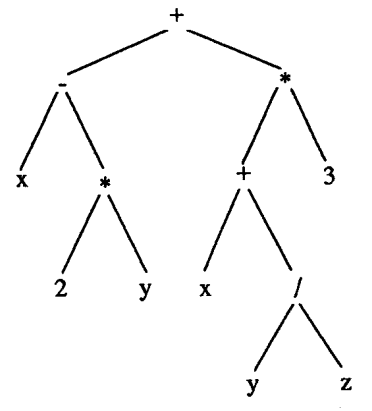
</p>

In [ ]:
@pytest.fixture()
def mon_arbre():
    pass

#### solution

In [ ]:
@pytest.fixture()
def mon_arbre():
    N = NoeudBin # alias
    return N("+",
        N("-",
            N("x"),
            N("*", N(2), N("y")),
        ),
        N("*",
            N("+",
                N("x"),
                N("/", N("y"), N("z")),
            ),
            N(3),
        ),
    )

ou encore ...

In [ ]:
@pytest.fixture()
def mon_arbre():
    N = NoeudBin # alias
    return N("A",
        N("B"),
        N("C", N("D"), N("E")),
    )

## Noeud internes et externes

<p style="text-align: center;">
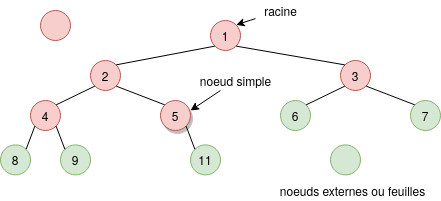
</p>

Parmi les noeuds d'un arbre, on distingue:
- les *noeuds externes* aussi appelés **feuilles** \[ *leaf* \] et qui n'ont aucun «enfant» (gauche et droit sont des sous-arbres vides),
- des *noeuds internes* qui ont donc au moins un enfant (gauche ou droit) non vide et qu'on précise parfois en parlant **noeud double** ou **simple** selon qu'ils ont - exactement - deux ou un enfant.

L'unique noeud sans «parent» de l'arbre est appelé **racine**.

#### Exercice 2

On souhaite écrire des méthodes `est_feuille`, `est_simple` et `est_double` pour la classe `NoeudBin` afin de savoir si un noeud donné est une feuille ou s'il est simple ou double.

Pour respecter la méthode de «dévoloppement dirigé par les tests» \[ *TDD* \], on commence par concevoir un (ou plusieurs) scénario(s) de tests **avant** d'implémenter les méthodes testées. **À vous de jouer**:

In [ ]:
%%run_pytest[clean]

def test_est_feuille_ou_simple_ou_double(pedigree, mon_arbre):
    pass

In [ ]:
%%run_pytest[clean]

def test_est_feuille_ou_simple_ou_double(pedigree, mon_arbre):
    # je suppose que «mon_arbre» est l'expression arithmétique
    assert pedigree.est_double()
    eclair = pedigree.gauche.droit
    nebuleuse = pedigree.droit.gauche
    assert eclair.est_simple()
    assert nebuleuse.est_feuille()
    assert not mon_arbre.est_simple()
    assert not mon_arbre.est_feuille()
    assert mon_arbre.est_double()

In [ ]:
def est_double(self):
    """Renvoie True si le noeud a deux enfants exactement, False autrement."""
    pass

def est_feuille(self):
    """Renvoie True si le noeud n'a pas d'enfant, False autrement."""
    pass

def est_simple(self):
    """Renvoie True si le noeud n'a qu'un enfant, False autrement."""
    pass

# on «attache» les méthodes à la classe ...
NoeudBin.est_double = est_double
NoeudBin.est_simple = est_simple
NoeudBin.est_feuille = est_feuille
# ... puis on supprime les noms de fonctions pour ne pas «polluer» l'espace de nommage «global»
del est_double; del est_feuille; del est_simple

In [ ]:
def est_double(self):
    """Renvoie True si le noeud a deux enfants exactement, False autrement."""
    return self.gauche and self.droit

def est_feuille(self):
    """Renvoie True si le noeud n'a pas d'enfant, False autrement."""
    return not self.gauche and not self.droit

def est_simple(self):
    """Renvoie True si le noeud n'a qu'un enfant, False autrement."""
    return self.gauche and not self.droit \
        or self.droit and not self.gauche

# on «attache» les méthodes à la classe ...
NoeudBin.est_double = est_double
NoeudBin.est_simple = est_simple
NoeudBin.est_feuille = est_feuille
# ... puis on supprime les noms de fonctions pour ne pas «polluer» l'espace de nommage «global»
del est_double; del est_feuille; del est_simple

#### Python «tip»: Valeurs dans une expression booléenne

Dans le contexte d'une expression booléenne (qui produit soit True, soit False), python convertit *automatiquement les valeurs qu'il rencontre en booléen*. Il procède approximativement selon le principe suivant:
> Si une valeur est «vide» ou de longueur nulle, elle est convertie en False; sinon en True. 

Ainsi `None`, `0`, `[]`, `""` ou `{}` seront convertie en **False** et `1`, `" "` et `[0]` en **True**.

Cependant, une instance d'une classe définie par l'utilisateur (qui ne définie ni `__len__` ni `__bool__` - [voir ici](https://docs.python.org/fr/3/reference/datamodel.html#object.__bool__)) sera toujours convertie en **True** (même si tous ses attributs valent None).

Cela produit un léger surcoût (appels sous-jacents) mais rend le code plus léger et plus simple à écrire.

## Nombre de noeuds

On souhaite écrire une méthode `NoeudBin.taille()` renvoyant le nombre de noeuds de l'arbre binaire dont la racine est le noeud courant `self`. Pour y parvenir, on peut procèder **récursivement** (souvenir, souvenir...).

Essayez de vous débrouiller par vous même en considérant:
- le cas (de base) où le noeud n'a pas d'enfant puis
- le cas général où il en a au moins un (qu'on peut assimiler à un sous-arbre...).

Mais écrivez votre scénario de test avant!

#### Exercice 3

In [ ]:
%%run_pytest[clean]

def test_taille(pedigree, mon_arbre):
    assert False

In [ ]:
%%run_pytest[clean]

def test_taille(pedigree, mon_arbre):
    assert NoeudBin("").taille() == 1
    assert pedigree.taille() == 10
    assert mon_arbre.taille() == 13

In [ ]:
def taille(self):
    """Renvoie le nombre de noeuds de l'arbre dont la racine est le noeud courant self"""
    pass

NoeudBin.taille = taille
del taille

In [ ]:
def taille(self):
    """Renvoie le nombre de noeuds de l'arbre dont la racine est le noeud courant self"""
    if self.est_feuille():
        return 1
    return 1 + (self.gauche.taille() if self.gauche else 0)\
             + (self.droit.taille() if self.droit else 0)

NoeudBin.taille = taille
del taille

#### *Python «tip»*: l'opérateur ternaire `expr1 if test else expr2`

Lorsqu'on code, on est souvent amené à écrire des «mini-tests» qui peuvent être avantageusement abrégés:
```python
if test:
    var = expr1
else:
    var = expr2

# est équivalent à

var = expr1 if test else expr2
```

où les `expr*` désignent des expressions qui doivent produire une valeur.

On peut aussi utiliser cet opérateur dans des expressions, mais il est alors plus prudent d'indiquer sa priorité à l'aide de parenthèses.

```python
1 + (objet.gauche.taille() if objet.gauche else 0) + (objet.droit.taille() if objet.droit else 0)
```

## Hauteur et profondeur

<p style="text-align: center;">
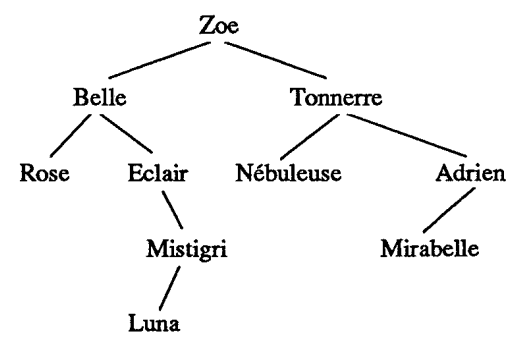
</p>

La **profondeur** d'un noeud est le *nombre de liens* qui compose l'unique chemin qui part de la racine pour aboutir à ce noeud. Par exemple la profondeur de «Mistigri» est 3.

La **hauteur** *d'un noeud* est le nombre de liens du chemin le plus long qui part de ce noeud et aboutit à une feuille. Par exemple, la hauteur de Mistigri est 1, celle de Tonnerre est 2.

La **hauteur** *d'un arbre* est celle de sa racine (ou est indéfinie s'il n'en a pas). On peut aussi dire que c'est la profondeur maximale de ses noeuds. Par exemple, la hauteur de «pedigree» vaut 4.

On qualifie de **branche** tout chemin - suite de noeuds consécutifs - depuis la racine jusqu'à une feuille: il y a autant de branches que de feuilles.

La **longueur d'une branche** est le nombre de liens (transition entre deux noeuds consécutifs) qu'elle contient; Ainsi, on peut dire que la **hauteur** d'un arbre est *la longueur de sa plus longue branche*.

#### Exercice 4

In [ ]:
%%run_pytest[clean]

def test_hauteur(pedigree, mon_arbre):
    assert False

In [ ]:
%%run_pytest[clean]

def test_hauteur(pedigree, mon_arbre):
    assert NoeudBin("").hauteur() == 0
    assert pedigree.hauteur() == 4
    assert mon_arbre.hauteur() == 4

In [ ]:
def hauteur(self):
    """Renvoie la hauteur de l'arbre dont la racine est le noeud courant self.
    La hauteur d'un arbre est le nombre de liens de sa plus grande branche.
    """
    pass

NoeudBin.hauteur = hauteur
del hauteur

In [ ]:
def hauteur(self):
    """Renvoie la hauteur de l'arbre dont la racine est le noeud courant self.
    La hauteur d'un arbre est le nombre de liens de sa plus grande branche.
    """
    if self.est_feuille():
        return 0
    return 1 + max(
        self.gauche.hauteur() if self.gauche else 0,
        self.droit.hauteur() if self.droit else 0
    )

NoeudBin.hauteur = hauteur
del hauteur

## Ancêtres et descendants

Un noeud $a$ est un **ancêtre** d'un noeud $b$ si:
- $a=b$ ou,
- $b$ est un noeud du sous-arbre gauche ou du sous-arbre droit de $a$. 

Si $a$ est un ancêtre de $b$, alors $b$ est un **descendant** de $a$.

<p style="text-align: center;">
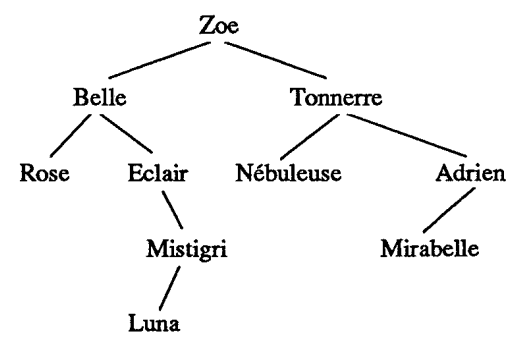
</p>

Ainsi, pour l'arbre «pedigree», *Mistigri* a pour **ancêtres** lui-même, Eclair, Belle et Zoe. Belle a pour **descendants** lui-même, Rose, Eclair, Mistigri et Luna.

*Note*: évidemment le vocabulaire est «à l'envers» pour cette situation particulière.

#### Exercice 5

Je pense que la consigne est claire à ce stade.

In [ ]:
%%run_pytest[clean]

def test_est_ancetre_ou_descendant(pedigree):
    assert False

In [ ]:
%%run_pytest[clean]

def test_est_ancetre_ou_descendant(pedigree):
    zoe = pedigree
    eclair = zoe.gauche.droit
    luna = eclair.droit.gauche
    mirabelle = zoe.droit.droit.gauche
    for n in [eclair, luna, mirabelle]:
        assert zoe.est_ancetre(n)
    assert eclair.est_ancetre(luna)
    assert not mirabelle.est_ancetre(luna)

In [ ]:
def est_ancetre(self, n):
    """Renvoie True si le noeud courant est un ancetre du noeud fourni en argument.
    Un noeud n1 est un ancetre d'un noeud n2 si n2 fait partie de l'arbre enraciné
    au noeud n1."""
    pass

NoeudBin.est_ancetre = est_ancetre
del est_ancetre

In [ ]:
def est_descendant(self, n):
    """Renvoie True si le noeud courant est un descendant du noeud fourni en argument."""
    pass

NoeudBin.est_descendant = est_descendant
del est_descendant

In [ ]:
def est_ancetre(self, n):
    """Renvoie True si le noeud courant est un ancetre du noeud fourni en argument.
    Un noeud n1 est un ancetre d'un noeud n2 si n2 fait partie de l'arbre enraciné
    au noeud n1."""
    if self is n:
        return True
    return (self.gauche.est_ancetre(n) if self.gauche else False) or \
           (self.droit.est_ancetre(n) if self.droit else False)

def est_descendant(self, n):
    """Renvoie True si le noeud courant est un descendant du noeud fourni en argument."""
    return n.est_ancetre(self)

NoeudBin.est_ancetre = est_ancetre
NoeudBin.est_descendant = est_descendant
del est_ancetre; del est_descendant